# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

casc_path = '/cv-course/Lib/cv2/data/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(casc_path)

### Step 1

Load an image (any image that contains faces).

(<Axes: title={'center': 'GRAY'}>,
 Text(0.5, 1.0, 'GRAY'),
 <matplotlib.image.AxesImage at 0x137367735e0>)

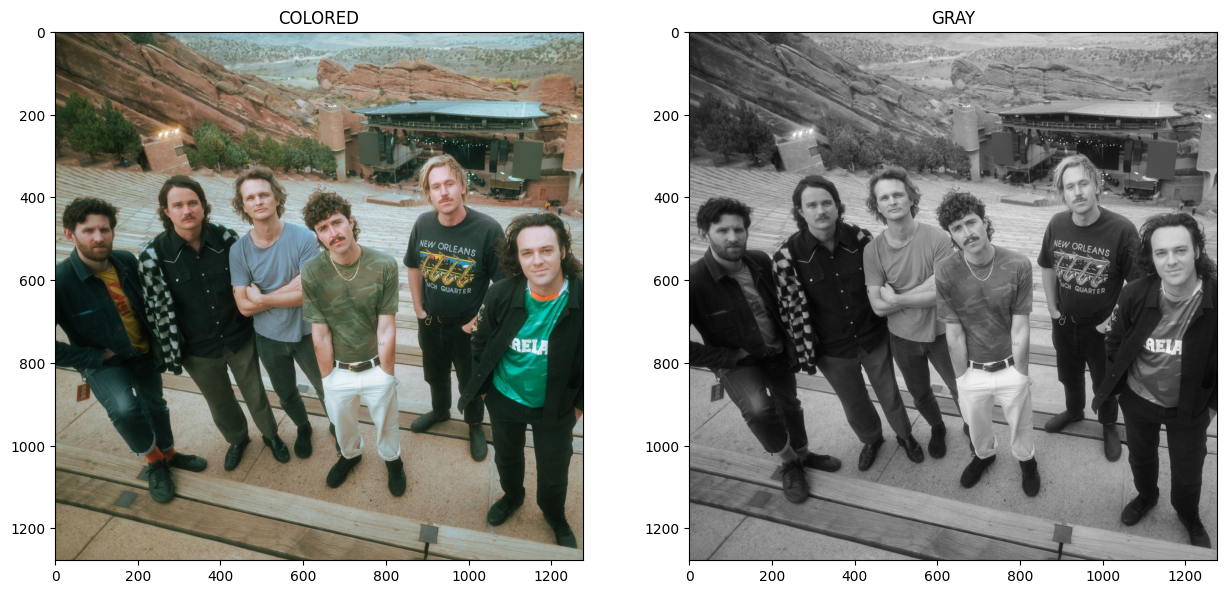

In [26]:
def read_image_rgb_gray(path):
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

    return rgb, gray

kgawl_rgb, kgawl_gray = read_image_rgb_gray('../data/kgawl.jpg')
kgawl_effect_rgb, kgawl_effect_gray = read_image_rgb_gray('../data/kgawl-red-effect.jpg')
kgawl_helmets_rgb, kgawl_helmets_gray = read_image_rgb_gray('../data/kgawl-helmets.webp')

plt.subplot(121), plt.title("COLORED"), plt.imshow(kgawl_rgb)
plt.subplot(122), plt.title("GRAY"), plt.imshow(kgawl_gray, cmap='gray')

(<Axes: title={'center': 'GRAY'}>,
 Text(0.5, 1.0, 'GRAY'),
 <matplotlib.image.AxesImage at 0x1372ade5a50>)

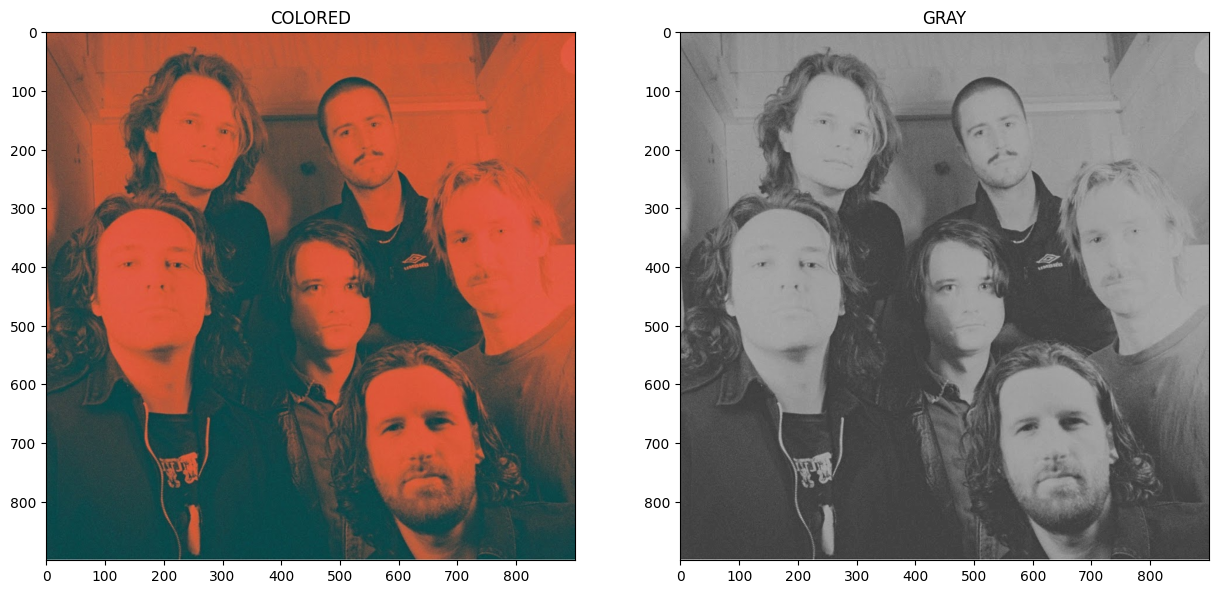

In [27]:
plt.subplot(121), plt.title("COLORED"), plt.imshow(kgawl_effect_rgb)
plt.subplot(122), plt.title("GRAY"), plt.imshow(kgawl_effect_gray, cmap='gray')

(<Axes: title={'center': 'GRAY'}>,
 Text(0.5, 1.0, 'GRAY'),
 <matplotlib.image.AxesImage at 0x13730f4f220>)

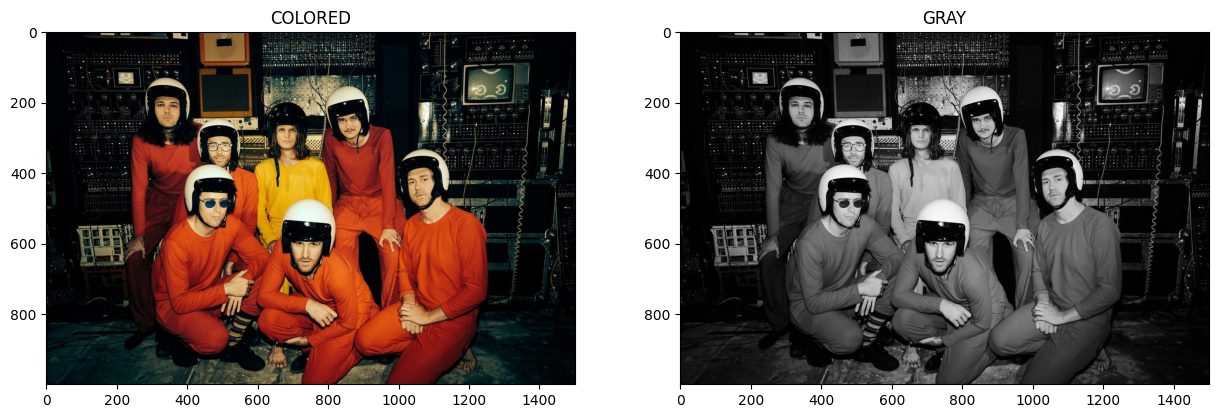

In [28]:
plt.subplot(121), plt.title("COLORED"), plt.imshow(kgawl_helmets_rgb)
plt.subplot(122), plt.title("GRAY"), plt.imshow(kgawl_helmets_gray, cmap='gray')

### Step 2

Load the dlib face predictor.

In [29]:
import dlib

### Step 3

Run the predictor on your image.

In [30]:
# Let's load the detector
detector = dlib.get_frontal_face_detector()
# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects_normal = detector(kgawl_gray, 1)
rects_effect = detector(kgawl_effect_gray, 1)
rects_helmets = detector(kgawl_helmets_gray, 1)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

def draw_rects_on_image(rects, img):
    result_img = np.copy(img)
    faces_img = []
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        print(x, y, w, h)
        cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 3)
        faces_img.append(img[y:y+h, x:x+w, :])
    
    return result_img

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

56 454 89 90
1099 483 129 129
453 378 74 75
892 345 90 90
633 445 90 89
275 395 89 89


(<Axes: title={'center': 'FACES'}>,
 Text(0.5, 1.0, 'FACES'))

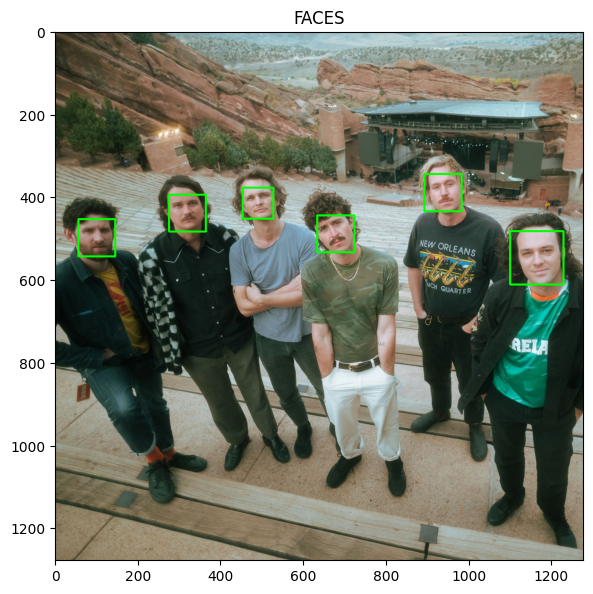

In [31]:
faces_normal = draw_rects_on_image(rects_normal, kgawl_rgb)

plt.subplot(122), plt.imshow(faces_normal), plt.title('FACES')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust? - Yeah, I would say it is quite robust. It only failed in case of photo with bad dynamic range.

513 613 223 223
408 391 154 155
483 125 129 129
201 98 155 155
97 345 186 186


(<Axes: title={'center': 'FACES'}>,
 Text(0.5, 1.0, 'FACES'))

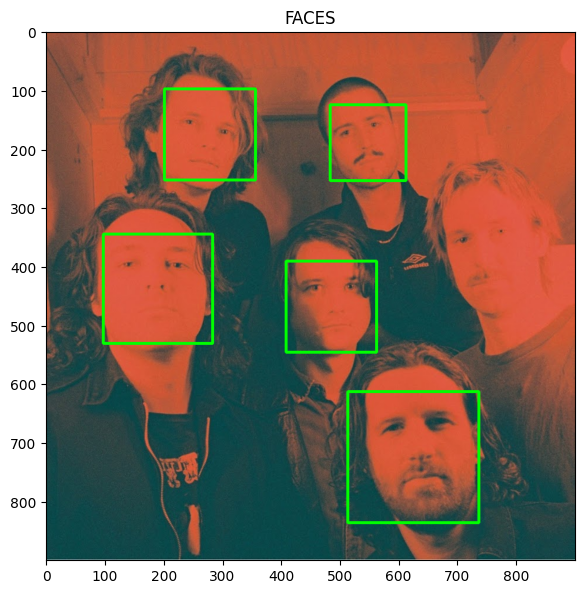

In [32]:
faces_effect = draw_rects_on_image(rects_effect, kgawl_effect_rgb)

plt.subplot(122), plt.imshow(faces_effect), plt.title('FACES')

1011 395 90 89
434 454 90 90
303 196 75 75
653 267 63 62
693 584 89 89
826 232 62 62
453 304 74 74


(<Axes: title={'center': 'FACES'}>,
 Text(0.5, 1.0, 'FACES'))

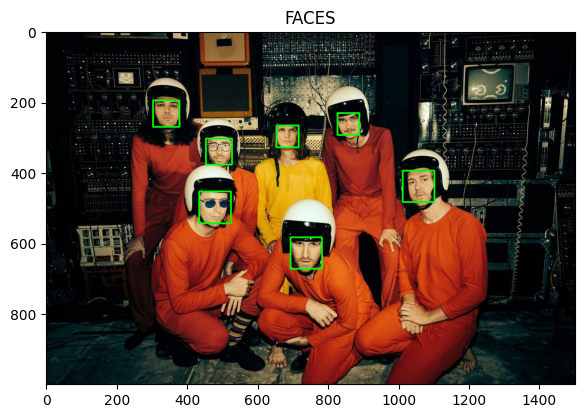

In [33]:
faces_helmets = draw_rects_on_image(rects_helmets, kgawl_helmets_rgb)

plt.subplot(122), plt.imshow(faces_helmets), plt.title('FACES')